# Unsupervised Learning 

In [1]:
# Setup
from utils.lecture10 import *
%matplotlib inline

### Supervised vs Unsupervised Learning

The difference between *supervised learning* and *unsupervised learning* is that in the first case we have a variable $y$ which we want to predict, given a set of variables $\{ X_1, . . . , X_p \}$.

In *unsupervised learning* are not interested in prediction, because we do not have an associated response variable $y$. Rather, the goal is to discover interesting properties about the measurements on $\{ X_1, . . . , X_p \}$. 

Questions that we are usually interested in are
- Clustering
- Dimensionality reduction

In general, unsupervised learning can be viewed as an extention of exploratory data analysis.

### Dimensionality Reduction

Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable (hard to control or deal with). 

Dimensionality reduction can also be useful to plot high-dimensional data. 

### Clustering

Clustering refers to a very broad set of techniques for finding subgroups, or clusters, in a data set. When we cluster the observations of a data set, we seek to partition them into distinct groups so that the observations within each group are quite similar to each other, while observations in different groups are quite different from each other.

In this section we focus on the following algorithms:

1. **K-means clustering**
2. **Hierarchical clustering**
3. **Gaussian Mixture Models**

## Principal Component Analysis

Suppose that we wish to visualize $n$ observations with measurements on a set of $p$ features, $\{X_1, . . . , X_p\}$, as part of an exploratory data analysis.

We could do this by examining two-dimensional scatterplots of the data, each of which contains the n observations’ measurements on two of the features. However, there are $p(p−1)/2$ such scatterplots; for example,
with $p = 10$ there are $45$ plots! 

PCA provides a tool to do just this. It finds a low-dimensional represen- tation of a data set that contains as much as possible of the variation. 



### First Principal Component

The **first principal component** of a set of features $\{X_1, . . . , X_p\}$ is the normalized linear combination of the features $Z_1$

$$
Z_1 = \phi_{11} X_1 + \phi_{21} X_2 + ... + \phi_{p1} X_p
$$

that has the largest variance. 

By normalized, we mean that $\sum_{i=1}^p \phi^2_{i1} = 1$.

### PCA Computation

In other words, the first principal component loading vector solves the optimization problem

$$
\underset{\phi_{11}, \ldots, \phi_{p 1}}{\max} \ \Bigg \lbrace \frac{1}{n} \sum _ {i=1}^{n}\left(\sum _ {j=1}^{p} \phi _ {j1} x _ {ij} \right)^{2} \Bigg \rbrace \quad \text { subject to } \quad \sum _ {j=1}^{p} \phi _ {j1}^{2}=1
$$

The objective that we are maximizing is just the sample variance of the $n$ values of $z_{i1}$.

After the first principal component $Z_1$ of the features has been determined, we can find the second principal component $Z_2$. The **second principal component** is the linear combination of $\{X_1, . . . , X_p\}$ that has maximal variance out of all linear combinations that are *uncorrelated* with $Z_1$.

### Example

We illustrate the use of PCA on the `USArrests` data set. 

For each of the 50 states in the United States, the data set contains the number of arrests per $100,000$ residents for each of three crimes: `Assault`, `Murder`, and `Rape.` We also record the percent of the population in each state living in urban areas, `UrbanPop`.

In [2]:
# Load crime data
df = pd.read_csv('data/USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### Data Scaling 

To make all the features comparable, we first need to scale them. In this case, we use the `sklearn.preprocessing.scale()` function to normalize each variable to have zero mean and unit variance. 

In [3]:
# Scale data
X_scaled = pd.DataFrame(scale(df), index=df.index, columns=df.columns).values

We will see later what are the practical implications of (not) scaling.

### Fitting

Let's fit PCA with 2 components.

In [4]:
# Fit PCA with 2 components
pca2 = PCA(n_components=2).fit(X_scaled)

In [5]:
# Get weights
weights = pca2.components_.T
df_weights = pd.DataFrame(weights, index=df.columns, columns=['PC1', 'PC2'])
df_weights

,PC1,PC2
Murder,0.535899,0.418181
Assault,0.583184,0.187986
UrbanPop,0.278191,-0.872806
Rape,0.543432,-0.167319


### Projecting the data

What does the trasformed data looks like?

In [6]:
# Transform X to get the principal components
X_dim2 = pca2.transform(X_scaled)
df_dim2 = pd.DataFrame(X_dim2, columns=['PC1', 'PC2'], index=df.index)
df_dim2.head()

,PC1,PC2
State,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


### Visualization

The advantage og PCA is that it allows us to see the variation in lower dimesions.

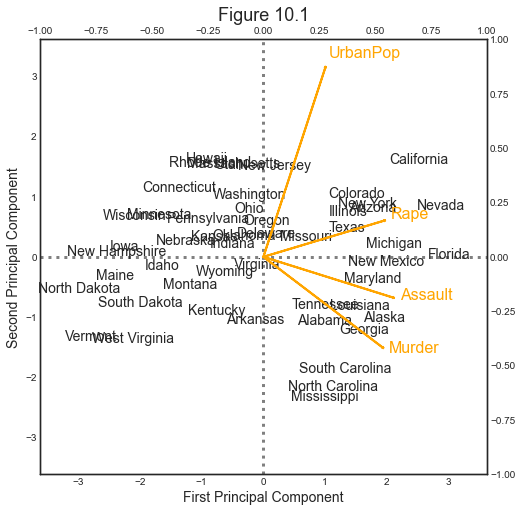

In [7]:
make_figure_10_1a(df_dim2, df_weights)

### PCA and Spectral Analysis

In case you haven't noticed, calculating principal components, is equivalent to calculating the eigenvectors of the design matrix $X'X$, i.e. the variance-covariance matrix of $X$. Indeed what we performed above is a decomposition of the variance of $X$ into orthogonal components.

The constrained maximization problem above can be re-written in matrix notation as

$$
\max \ \phi' X'X \phi \quad \text{ s. t. } \quad \phi'\phi = 1
$$

Which has the following dual representation

$$
\mathcal L (\phi, \lambda) = \phi' X'X \phi - \lambda (\phi'\phi - 1)
$$

If we take the first order conditions

$$
\begin{align}
& \frac{\partial \mathcal L}{\partial \lambda} = \phi'\phi - 1 \\
& \frac{\partial \mathcal L}{\partial \phi} = 2 X'X \phi - 2 \lambda \phi
\end{align}
$$

Setting the derivatives to zero at the optimum, we get

$$
\begin{align}
& \phi'\phi = 1 \\
& X'X \phi = \lambda \phi
\end{align}
$$

Thus, $\phi$ is an **eigenvector** of the covariance matrix $X'X$, and the maximizing vector will be the one associated with the largest **eigenvalue** $\lambda$. 

### Eigenvalues and eigenvectors 

We can now double-check it using `numpy` linear algebra package.

In [8]:
eigenval, eigenvec = np.linalg.eig(X_scaled.T @ X_scaled)
data = np.concatenate((eigenvec,eigenval.reshape(1,-1)))
idx = list(df.columns) + ['Eigenvalue']
df_eigen = pd.DataFrame(data, index=idx, columns=['PC1', 'PC2','PC3','PC4'])

df_eigen

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,0.649228,-0.341233
Assault,0.583184,0.187986,-0.743407,-0.268148
UrbanPop,0.278191,-0.872806,0.133878,-0.378016
Rape,0.543432,-0.167319,0.089024,0.817778
Eigenvalue,124.012079,49.488258,8.671504,17.828159


The spectral decomposition of the variance of $X$ generates a set of orthogonal vectors (eigenvectors) with different magnitudes (eigenvalues). The eigenvalues tell us the amount of variance of the data in that direction.

If we combine the eigenvectors together, we form a projection matrix $P$ that we can use to transform the original variables: $\tilde X = P X$

In [9]:
X_transformed = X_scaled @ eigenvec
df_transformed = pd.DataFrame(X_transformed, index=df.index, columns=['PC1', 'PC2','PC3','PC4'])

df_transformed.head()

,PC1,PC2,PC3,PC4
State,,,,
Alabama,0.985566,1.133392,0.156267,-0.444269
Alaska,1.950138,1.073213,-0.438583,2.040003
Arizona,1.763164,-0.745957,-0.834653,0.054781
Arkansas,-0.141420,1.119797,-0.182811,0.114574
California,2.523980,-1.542934,-0.341996,0.598557


This is exactly the dataset that we obtained before.

### Scaling the Variables

The results obtained when we perform PCA will also depend on whether the variables have been individually scaled. In fact, the variance of a variable depends on its magnitude.

In [10]:
# Variables variance
df.var(axis=0)

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Consequently, if we perform PCA on the unscaled variables, then the first principal component loading vector will have a very large loading for `Assault`, since that variable has by far the highest variance.

In [11]:
# Fit PCA with unscaled varaibles
X = df.values
pca2_u = PCA(n_components=2).fit(X)

In [12]:
# Get weights
weights_u = pca2_u.components_.T
df_weights_u = pd.DataFrame(weights_u, index=df.columns, columns=['PC1', 'PC2'])
df_weights_u

,PC1,PC2
Murder,0.041704,0.044822
Assault,0.995221,0.058760
UrbanPop,0.046336,-0.976857
Rape,0.075156,-0.200718


In [13]:
# Transform X to get the principal components
X_dim2_u = pca2_u.transform(X)
df_dim2_u = pd.DataFrame(X_dim2_u, columns=['PC1', 'PC2'], index=df.index)

### Plotting

We can compare the lower dimensional representations with and without scaling.

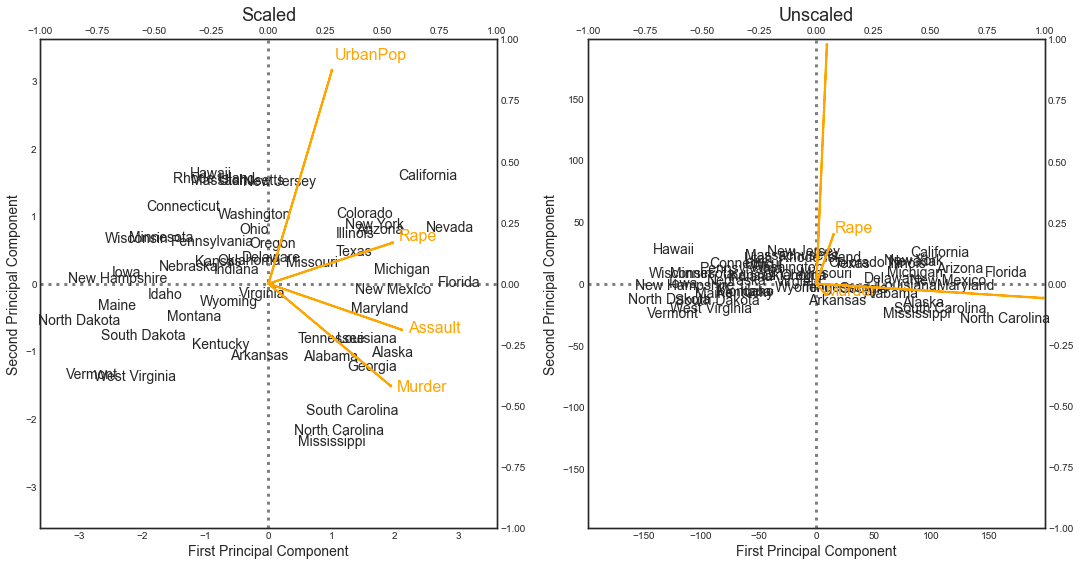

In [14]:
make_figure_10_1b(df_dim2, df_dim2_u, df_weights, df_weights_u)

As predicted, the first principal component loading vector places almost all of its weight on `Assault`, while the second principal component loading vector places almost all of its weight on `UrpanPop`. Comparing this to the left-hand plot, we see that scaling does indeed have a substantial effect on the results obtained. However, this result is simply a consequence of the scales on which the variables were measured. 

### The Proportion of Variance Explained

We can now ask a natural question: how much of the information in a given data set is lost by projecting the observations onto the first few principal components? That is, how much of the variance in the data is not contained in the first few principal components? More generally, we are interested in knowing the **proportion of variance explained (PVE)** by each principal component. 

In [15]:
# Four components
pca4 = PCA(n_components=4).fit(X_scaled)

In [16]:
# Variance of the four principal components
pca4.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

### Interpretation

We can compute it in percentage of the total variance.

In [17]:
# As a percentage of the total variance
pca4.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In the `Arrest` dataset, the first principal component explains $62.0\%$ of the variance in the data, and the next principal component explains $24.7\%$ of the variance. Together, the first two principal components explain almost $87\%$ of the variance in the data, and the last two principal components explain only $13\%$ of the variance.

### Plotting

We can plot in a graph the percentage of the variance explained, relative to the number of components.

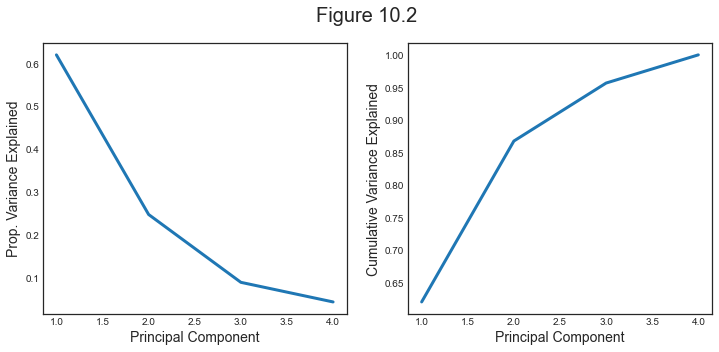

In [18]:
make_figure_10_2(pca4)

### How Many Principal Components?

In general, a $n \times p$ data matrix $X$ has $\min\{n − 1, p\}$ distinct principal components. However, we usually are not interested in all of them; rather, we would like to use just the first few principal components in order to visualize or interpret the data. 

We typically decide on the number of principal components required to visualize the data by examining a *scree plot*.

However, there is no well-accepted objective way to decide how many principal com- ponents are enough.

## K-Means Clustering

The idea behind K-means clustering is that a good clustering is one for which the within-cluster variation is as small as possible. Hence we want to solve the problem

$$
\underset{C_{1}, \ldots, C_{K}}{\operatorname{minimize}} \Bigg\lbrace \sum_{k=1}^{K} W\left(C_{k}\right) \Bigg\rbrace
$$

where $C_k$ is a cluster and $ W(C_k)$ is a measure of the amount by which the observations within a cluster differ from each other.

There are many possible ways to define this concept, but by far the most common choice involves **squared Euclidean distance**. That is, we define

$$
W\left(C_{k}\right)=\frac{1}{\left|C_{k}\right|} \sum_{i, i^{\prime} \in C_{k}} \sum_{j=1}^{p}\left(x_{i j}-x_{i^{\prime} j}\right)^2
$$

where $|C_k|$ denotes the number of observations in the $k^{th}$ cluster. 

### Algorithm

1. Randomly assign a number, from $1$ to $K$, to each of the observations. These serve as initial cluster assignments for the observations.

2. Iterate until the cluster assignments stop changing:

    a) For each of the $K$ clusters, compute the cluster centroid. The kth cluster centroid is the vector of the $p$ feature means for the observations in the $k^{th}$ cluster.
    
    b) Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).

### Generate the data

We first generate a 2-dimensional dataset.

In [19]:
# Simulate data
np.random.seed(123)
X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

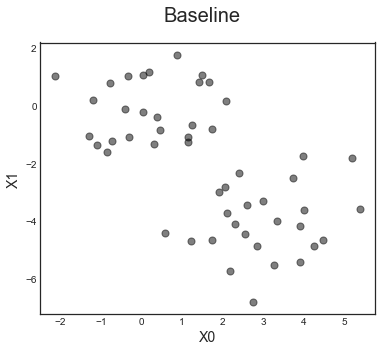

In [20]:
make_new_figure_1(X)

### Step 1: random assignement

Now let's randomly assign the data to two clusters, at random.

In [21]:
# Init clusters
K = 2
clusters0 = np.random.randint(K,size=(np.size(X,0)))

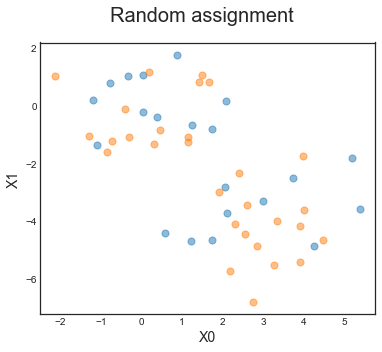

In [22]:
make_new_figure_2(X, clusters0)

### Step 2: estimate distributions

What are the new centroids?

In [23]:
# Compute new centroids
def compute_new_centroids(X, clusters):
    K = len(np.unique(clusters))
    centroids = np.zeros((K,np.size(X,1)))
    for k in range(K):
        if sum(clusters==k)>0:
            centroids[k,:] = np.mean(X[clusters==k,:], axis=0)
        else:
            centroids[k,:] = np.mean(X, axis=0)
    return centroids

In [24]:
# Print
centroids0 = compute_new_centroids(X, clusters0)
print(centroids0)

[[ 1.54179703 -1.65922379]
 [ 1.67917325 -2.36272948]]


### Plotting the centroids

Let's add the centroids to the graph.

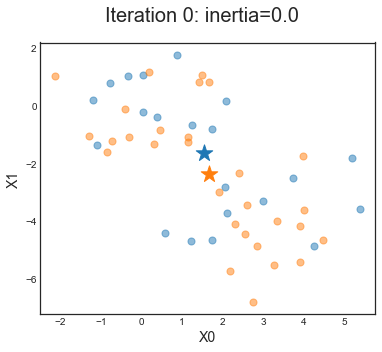

In [25]:
# Plot
plot_assignment(X, centroids0, clusters0, 0, 0)

### Step 3: assign data to clusters

Now we can assign the data to the clusters, according to the closest centroid.

In [26]:
# Assign X to clusters
def assign_to_cluster(X, centroids):
    K = np.size(centroids,0)
    dist = np.zeros((np.size(X,0),K))
    for k in range(K):
        dist[:,k] = np.mean((X - centroids[k,:])**2, axis=1)
    clusters = np.argmin(dist, axis=1)
    
    # Compute inertia
    inertia = 0
    for k in range(K):
        if sum(clusters==k)>0:
            inertia += np.sum((X[clusters==k,:] - centroids[k,:])**2)
    return clusters, inertia

### Plotting assigned data

In [27]:
# Get cluster assignment
[clusters1,d] = assign_to_cluster(X, centroids0)

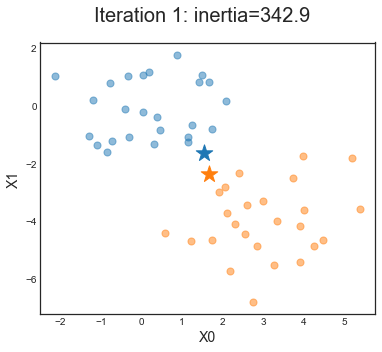

In [28]:
# Plot
plot_assignment(X, centroids0, clusters1, d, 1)

### Full Algorithm

We now have all the components to proceed iteratively.

In [29]:
def kmeans_manual(X, K):

    # Init
    i = 0
    d0 = 1e4
    d1 = 1e5
    clusters = np.random.randint(K,size=(np.size(X,0)))

    # Iterate until convergence
    while np.abs(d0-d1) > 1e-10:
        d1 = d0
        centroids = compute_new_centroids(X, clusters)
        [clusters, d0] = assign_to_cluster(X, centroids)
        plot_assignment(X, centroids, clusters, d0, i)
        i+=1

### Plotting k-means clustering

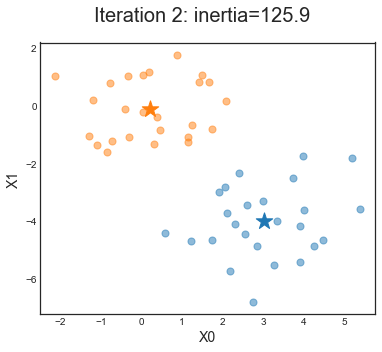

In [30]:
# Test
kmeans_manual(X, K)

Here the observations can be easily plotted because they are two-dimensional.
If there were more than two variables then we could instead perform PCA
and plot the first two principal components score vectors.

### More clusters

In the previous example, we knew that there really were two clusters because
we generated the data. However, for real data, in general we do not know
the true number of clusters. We could instead have performed K-means
clustering on this example with `K  =  3`. If we do this, K-means clustering will split up the two "real" clusters, since it has no information about them:

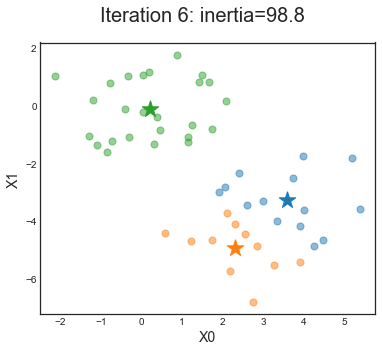

In [31]:
# K=3
kmeans_manual(X, 3)

### Sklearn package

The automated function in `sklearn` to persorm $K$-means clustering is `KMeans`. 

In [32]:
# SKlearn algorithm
km1 = KMeans(n_clusters=3, n_init=1, random_state=1)
km1.fit(X)

KMeans(n_clusters=3, n_init=1, random_state=1)

### Plotting

We can plot the asssignment generated by the `KMeans` function.

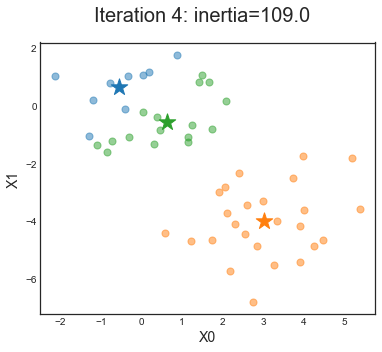

In [33]:
# Plot
plot_assignment(X, km1.cluster_centers_, km1.labels_, km1.inertia_, km1.n_iter_)

As we can see, the results are different in the two algorithms? Why? $K$-means is susceptible to the initial values. One way to solve this problem is to run the algorithm multiple times and report only the best results

### Initial Assignment

To run the `Kmeans()` function in python with multiple initial cluster assignments, we use the `n_init` argument (default: 10). If a value of `n_init` greater than one is used, then K-means clustering will be performed using multiple random assignments, and the `Kmeans()` function will report only the best results.

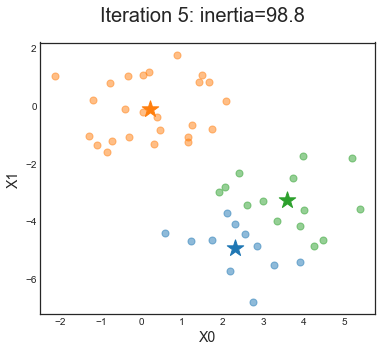

In [34]:
# 30 runs
km_30run = KMeans(n_clusters=3, n_init=30, random_state=1).fit(X)
plot_assignment(X, km_30run.cluster_centers_, km_30run.labels_, km_30run.inertia_, km_30run.n_iter_)

### Best Practices

It is generally recommended to always run K-means clustering with a large value of `n_init`, such as 20 or 50 to avoid getting stuck in an undesirable local optimum.

When performing K-means clustering, in addition to using multiple initial cluster assignments, it is also important to set a random seed using the `random_state` parameter. This way, the initial cluster assignments can be replicated, and the K-means output will be fully reproducible.

## Hierarchical Clustering

One potential disadvantage of K-means clustering is that it requires us to pre-specify the number of clusters $K$. 

Hierarchical clustering is an alternative approach which does not require that we commit to a particular choice of $K$.

### The Dendogram

Hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based representation of the observations, called a **dendrogram**.

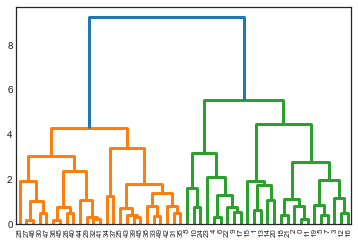

In [35]:
d = dendrogram(
        linkage(X, "complete"),
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    )

### Interpretation

Each leaf of the *dendrogram* represents one observation. 

As we move up the tree, some leaves begin to fuse into branches. These correspond to observations that are similar to each other. As we move higher up the tree, branches themselves fuse, either with leaves or other branches. The earlier (lower in the tree) fusions occur, the more similar the groups of observations are to each other.

We can use de *dendogram* to understand how similar two observations are: we can look for the point in the tree where branches containing those two obse rvations are first fused. The height of this fusion, as measured on the vertical axis, indicates how different the two observations are. Thus, observations that fuse at the very bottom of the tree are quite similar to each other, whereas observations that fuse close to the top of the tree will tend to be quite different.

The term **hierarchical** refers to the fact that clusters obtained by cutting the dendrogram at a given height are necessarily nested within the clusters obtained by cutting the dendrogram at any greater height.

### The Hierarchical Clustering Algorithm

1. Begin with $n$ observations and a measure (such as Euclidean distance) of all the $n(n − 1)/2$ pairwise dissimilarities. Treat each 2 observation as its own cluster.

2. For $i=n,n−1,...,2$

    a) Examine all pairwise inter-cluster dissimilarities among the $i$ clusters and identify the **pair of clusters that are least dissimilar** (that is, most similar). Fuse these two clusters. The dissimilarity between these two clusters indicates the height in the dendrogram at which the fusion should be placed.
    
    b) Compute the new pairwise inter-cluster dissimilarities among the $i−1$ remaining clusters.

### The Linkage Function

We have a concept of the dissimilarity between pairs of observations, but how do we define the dissimilarity between two clusters if one or both of the clusters contains multiple observations?

The concept of dissimilarity between a pair of observations needs to be extended to a pair of groups of observations. This extension is achieved by developing the notion of **linkage**, which defines the dissimilarity between two groups of observations.

### Linkages

The four most common types of linkage are:

1. **Complete**: Maximal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the largest of these dissimilarities.
2. **Single**: Minimal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the smallest of these dissimilarities. 
3. **Average**: Mean intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the average of these dissimilarities.
4. **Centroid**: Dissimilarity between the centroid for cluster A (a mean vector of length p) and the centroid for cluster B. Centroid linkage can result in undesirable inversions.

Average, complete, and single linkage are most popular among statisticians. Average and complete linkage are generally preferred over single linkage, as they tend to yield more balanced dendrograms. Centroid linkage is often used in genomics, but suffers from a major drawback in that an inversion can occur, whereby two clusters are fused at a height below either of the individual clusters in the dendrogram. This can lead to difficulties in visualization as well as in interpretation of the dendrogram.

In [36]:
# Init
linkages = [hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)]
titles = ['Complete Linkage', 'Average Linkage', 'Single Linkage']

### Plotting

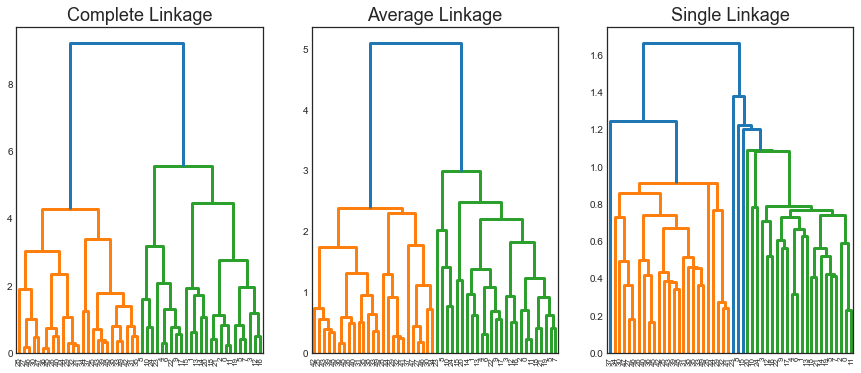

In [37]:
make_new_figure_4(linkages, titles)

For this data, both *complete* and *average* linkage generally separates the observations into their correct groups.

## Gaussian Mixture Models

Clustering methods such as hierarchical clustering and K-means are based on heuristics and rely primarily on finding clusters whose members are close to one another, as measured directly with the data (no probability model involved).

*Gaussian Mixture Models* assume that the data was generated by multiple multivariate gaussian distributions. The objective of the algorithm is to recover these latent distributions.

The advantages with respect to K-means are

- a structural interpretaion of the parameters 
- automatically generates class probabilities
- can generate clusters of observations that are not necessarily close to each other

### Algorithm

1. Randomly assign a number, from $1$ to $K$, to each of the observations. These serve as initial cluster assignments for the observations.

2. Iterate until the cluster assignments stop changing:

    a) For each of the $K$ clusters, compute its mean and variance. The main difference with K-means is that we also compute the variance matrix. 
    
    b) Assign each observation to its most likely cluster.

### Dataset

Let's use the same data we have used for k-means, for a direct comparison.

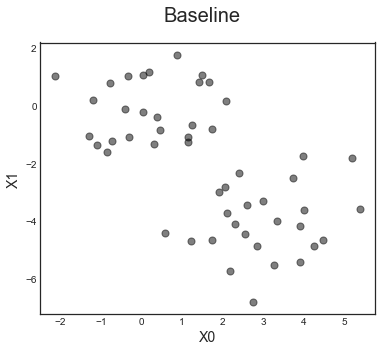

In [38]:
make_new_figure_1(X)

### Step 1: random assignement

Let's also use the same random assignment of the K-means algorithm.

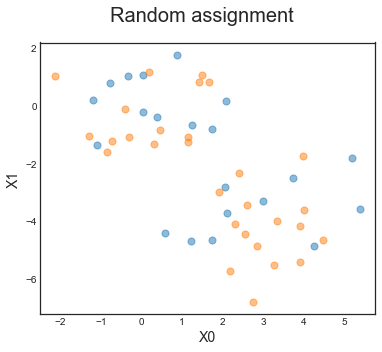

In [39]:
make_new_figure_2(X, clusters0)

### Step 2: compute distirbutions

What are the new distributions?

In [40]:
# Compute new centroids
def compute_distributions(X, clusters):
    K = len(np.unique(clusters))
    distr = []
    for k in range(K):
        if sum(clusters==k)>0:
            distr += [multivariate_normal(np.mean(X[clusters==k,:], axis=0), np.cov(X[clusters==k,:].T))]
        else:
            distr += [multivariate_normal(np.mean(X, axis=0), np.cov(X.T))]
    return distr

In [41]:
# Print
distr0 = compute_distributions(X, clusters0)
print("Mean of the first distribution: \n", distr0[0].mean)
print("\nVariance of the first distribution: \n", distr0[0].cov)

Mean of the first distribution: 
 [ 1.54179703 -1.65922379]

Variance of the first distribution: 
 [[ 3.7160256  -2.27290036]
 [-2.27290036  4.67223237]]


### Plotting the distributions

Let's add the distributions to the graph.

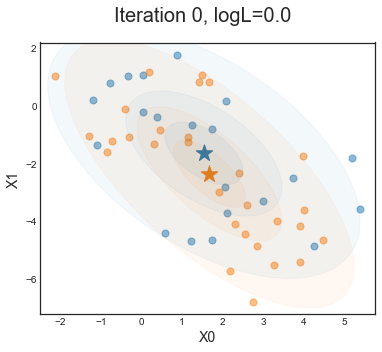

In [42]:
# Plot
plot_assignment_gmm(X, clusters0, distr0, i=0, logL=0.0)

### Likelihood

The main difference with respect with K-means is that we can now compute the probability that each observation belongs to each cluster. This is the probability that each observation was generated by one of the two bi-variate normal distributions. These probabilities are called **likelihoods**.

In [43]:
# Print first 5 likelihoods
pdfs0 = np.stack([d.pdf(X) for d in distr0], axis=1)
pdfs0[:5]

array([[0.03700522, 0.05086876],
       [0.00932081, 0.02117353],
       [0.04092453, 0.04480732],
       [0.00717854, 0.00835799],
       [0.01169199, 0.01847373]])

### Step 3: assign data to clusters

Now we can assign the data to the clusters, via maximum likelihood.

In [44]:
# Assign X to clusters
def assign_to_cluster_gmm(X, distr):
    pdfs = np.stack([d.pdf(X) for d in distr], axis=1)
    clusters = np.argmax(pdfs, axis=1)
    log_likelihood = 0
    for k, pdf in enumerate(pdfs):
        log_likelihood += np.log(pdf[clusters[k]])
    return clusters, log_likelihood

In [45]:
# Get cluster assignment
clusters1, logL1 = assign_to_cluster_gmm(X, distr0)

### Plotting assigned data

In [46]:
# Compute new distributions
distr1 = compute_distributions(X, clusters1)

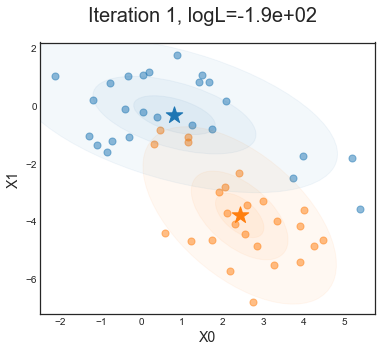

In [47]:
# Plot
plot_assignment_gmm(X, clusters1, distr1, 1, logL1)

### Expectation - Maximization

The two steps we have just seen, are part of a broader family of algorithms to maximize likelihoods called **expectation**-**maximization** algorithms.

In the expectation step, we computed the expectation of the parameters, given the current cluster assignment. 

In the maximization step, we assigned observations to the cluster that maximized the likelihood of the single observation.

The alternative, and more computationally intensive procedure, would have been to specify a global likelihood function and find the mean and variance paramenters of the two normal distributions that maximized those likelihoods.

### Full Algorithm

We can now deploy the full algorithm.

In [48]:
def gmm_manual(X, K):

    # Init
    i = 0
    logL0 = 1e4
    logL1 = 1e5
    clusters = np.random.randint(K,size=(np.size(X,0)))

    # Iterate until convergence
    while np.abs(logL0-logL1) > 1e-10:
        logL1 = logL0
        distr = compute_distributions(X, clusters)
        clusters, logL0 = assign_to_cluster_gmm(X, distr)
        plot_assignment_gmm(X, clusters, distr, i, logL0)
        i+=1

### Plotting k-means clustering

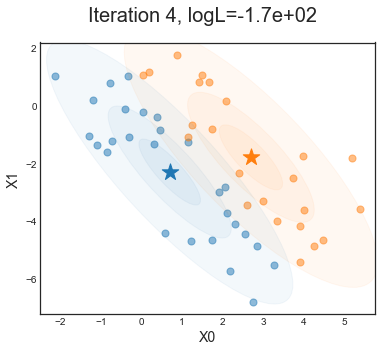

In [49]:
# Test
gmm_manual(X, K)

In this case, GMM does a very poor job identifying the original clusters.

### Overlapping Clusters

Let's now try with a different dataset, where the data is drawn from two overlapping bi-variate gaussian distributions, forming a cross.

In [50]:
# Simulate data
X = np.random.randn(50,2)
X[0:25, :] = np.random.multivariate_normal([0,0], [[50,0],[0,1]], size=25)
X[25:, :] = np.random.multivariate_normal([0,0], [[1,0],[0,50]], size=25)

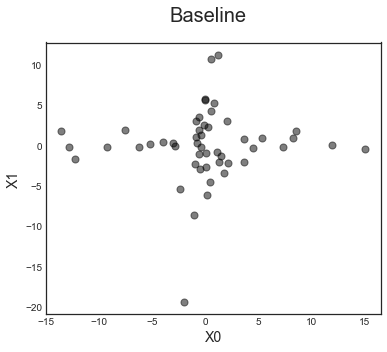

In [51]:
make_new_figure_1(X)

### GMM with overlapping distributions

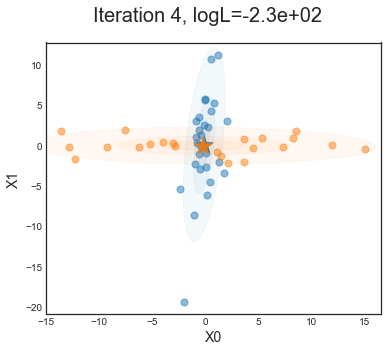

In [52]:
# GMM
gmm_manual(X, K)

As we can see, GMM is able to correctly recover the original clusters.

### K-means with overlapping distributions

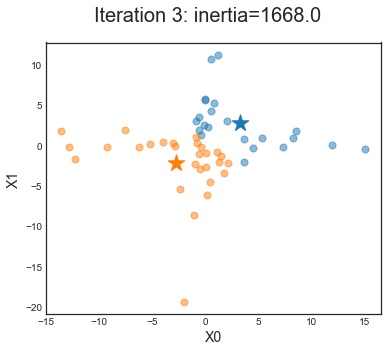

In [53]:
# K-means
kmeans_manual(X, K)

K-means generates completely different clusters.